In [2]:
!pip install mediapipe opencv-python fastdtw

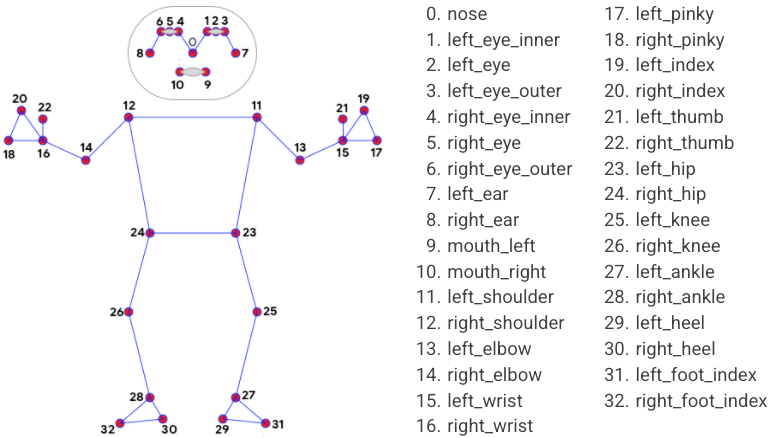

In [25]:
jump_val = 'jump2'

In [26]:
# Create directory for images
import os
os.mkdir('outputs/images/' + jump_val)

In [29]:
import cv2
import mediapipe as mp
import numpy as np
import os

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Setup Time Series
leftShoulderX, leftShoulderY, rightShoulderX, rightShoulderY, leftElbowX, leftElbowY, rightElbowX, rightElbowY, leftHipX, \
    leftHipY, rightHipX, rightHipY, leftKneeX, leftKneeY, rightKneeX, rightKneeY, leftAnkleX, leftAnkleY, rightAnkleX, \
    rightAnkleY = ([] for i in range(20))

count = 1000

# For static images:
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5) as pose:
    input_vid = cv2.VideoCapture('media/' + jump_val + '.mov')
    ret = 1
    while True:
        ret, frame = input_vid.read()
        if not ret:
            break
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        # Make detection
        results = pose.process(image)
        # Recolor back to BGR
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark
        except:
            continue

        # Render
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                  )
        cv2.imwrite('outputs/images/' + jump_val + '/image' + str(count) + '.png', image)

        leftShoulderX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x])
        leftShoulderY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])

        rightShoulderX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x])
        rightShoulderY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y])

        leftElbowX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x])
        leftElbowY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y])

        rightElbowX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x])
        rightElbowY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y])

        leftHipX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x])
        leftHipY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])

        rightHipX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x])
        rightHipY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])

        leftKneeX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x])
        leftKneeY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y])

        rightKneeX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x])
        rightKneeY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y])

        leftAnkleX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x])
        leftAnkleY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y])

        rightShoulderX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x])
        rightShoulderY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y])

        count += 1

In [32]:
len(landmarks)

33

In [33]:
landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]

x: 0.5217190980911255
y: 0.9058476686477661
z: 0.14375746250152588
visibility: 0.9673978090286255

In [34]:
count

87

In [30]:
image_folder = 'outputs/images/' + jump_val
video_name = 'outputs/videos/' + jump_val + '.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, 0, 30, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [31]:
rightElbowX = np.array(rightElbowX)
rightElbowY = np.array(rightElbowY)
leftElbowX = np.array(leftElbowX)
leftElbowY = np.array(leftElbowY)
rightShoulderX = np.array(rightShoulderX)
rightShoulderY = np.array(rightShoulderY)
leftShoulderX = np.array(leftShoulderY)
leftShoulderY = np.array(leftShoulderY)
rightHipX = np.array(rightHipX)
rightHipY = np.array(rightHipY)
leftHipX = np.array(leftHipX)
leftHipY = np.array(leftHipY)
rightKneeX = np.array(rightKneeX)
rightKneeY = np.array(rightKneeY)
leftKneeX = np.array(leftKneeX)
leftKneeY = np.array(leftKneeY)
rightAnkleX = np.array(rightAnkleX)
rightAnkleY = np.array(rightAnkleY)
leftAnkleX = np.array(leftAnkleX)
leftAnkleY = np.array(leftAnkleY)

In [32]:
body_parts = [leftShoulderX, leftShoulderY, rightShoulderX, rightShoulderY, leftElbowX, leftElbowY, rightElbowX, rightElbowY, leftHipX, \
    leftHipY, rightHipX, rightHipY, leftKneeX, leftKneeY, rightKneeX, rightKneeY, leftAnkleX, leftAnkleY, rightAnkleX, \
    rightAnkleY]

In [33]:
import pickle 
pickle.dump(body_parts, open( 'pickle_files/' + jump_val, "wb" ))

In [35]:
from matplotlib import pyplot as plt

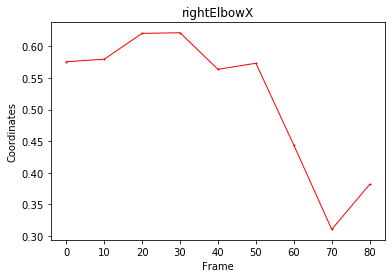

In [38]:
x1, y1 = rightElbowX.T
plt.plot(x1, y1, color='red', linewidth=1, label="rightElbowX")
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("rightElbowX")
plt.scatter(x1, y1, color='red', s=1)
plt.show()

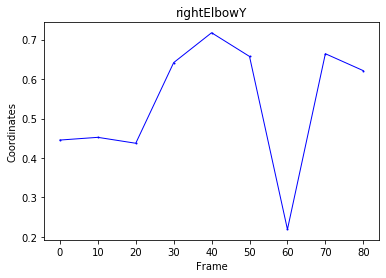

In [39]:
x1, y1 = rightElbowY.T
plt.plot(x1, y1, color='blue', linewidth=1, label="rightElbowY")
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("rightElbowY")
plt.scatter(x1, y1, color='blue', s=1)
plt.show()

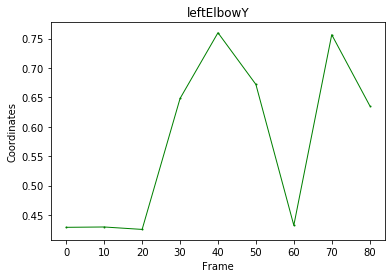

In [40]:
x1, y1 = leftElbowY.T
plt.plot(x1, y1, color='green', linewidth=1, label="leftElbowY")
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("leftElbowY")
plt.scatter(x1, y1, color='green', s=1)
plt.show()

In [38]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

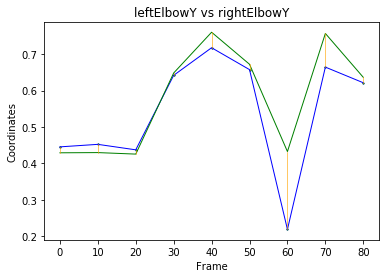

0.4353058636188507
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]


In [42]:
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("leftElbowY vs rightElbowY")

x1, y1 = rightElbowY.T
plt.plot(x1, y1, color='blue', linewidth=1, label="rightElbowY")
plt.scatter(x1, y1, color='blue', s=1)

x2, y2 = leftElbowY.T
plt.plot(x2, y2, color='green', linewidth=1, label="leftElbowY")
plt.scatter(x1, y1, color='green', s=1)

distance, path = fastdtw(leftElbowY, rightElbowY, dist=euclidean)
for i in path:
    xcoord, ycoord = zip(leftElbowY[i[0]], rightElbowY[i[1]])
    plt.plot(xcoord, ycoord, color='orange', linewidth=0.6)
plt.show()
print(distance)
print(path)

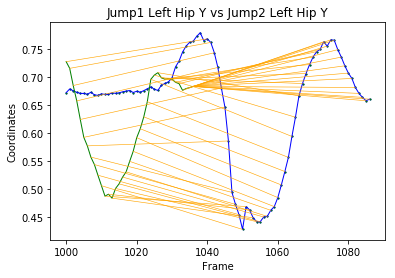

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 36), (38, 36), (39, 36), (40, 36), (41, 36), (42, 36), (43, 36), (44, 36), (45, 36), (46, 36)]


In [50]:
jump1_parts = pickle.load(open( "pickle_files/jump1", "rb" ))
jump2_parts = pickle.load(open( "pickle_files/jump2", "rb" ))

oneLeftHipY = jump1_parts[9][40:]
twoLeftHipY = jump2_parts[9]

plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("Jump1 Left Hip Y vs Jump2 Left Hip Y")

x1, y1 = np.array(jump1_parts[9]).T
plt.plot(x1, y1, color='blue', linewidth=1, label="oneLeftHipY")
plt.scatter(x1, y1, color='blue', s=1)

x2, y2 = twoLeftHipY.T
plt.plot(x2, y2, color='green', linewidth=1, label="twoLeftHipY")
plt.scatter(x1, y1, color='green', s=1)

distance, path = fastdtw(oneLeftHipY, twoLeftHipY, dist=euclidean)
for i in path:
    xcoord, ycoord = zip(oneLeftHipY[i[0]], twoLeftHipY[i[1]])
    plt.plot(xcoord, ycoord, color='orange', linewidth=0.6)
plt.show()
print(path)

In [55]:
def path_distance (arr1, arr2, path):
    sum = 0 
    for p in path: 
        sum += abs(arr1[p[0]][1] - arr2[p[1]][1]) 
    return sum

In [56]:
path_distance (oneLeftHipY, twoLeftHipY, path)

2.574404716491699